#Before your start with this Tutorial

**Tutorial Intention:** Providing an example of iteration and related step on a modeling phase for you to:

*   Experience the data science lifecycle using Vectice
*   See how simple it is to connect your notebook to Vectice
*   Learn how to structure and log your work using Vectice

**Resources needed:**
*   Forecast Unit Sales Tutorial Project: You can find it as part of your personal workspace named after your name
*   Vectice Webapp Documentation: 
*   Vectice API documentation: 

# PIP and package Installation

In [3]:
# You might need to install some packages before the actual Vectice Package installation as the build doesn't have a good wheel
!pip install -q python-dotenv gql Deprecated requests_toolbelt
!pip install s3fs
!pip install --upgrade setuptools
!pip install -q mypy_boto3_s3 boto3
!pip install --upgrade requests urllib3

# You need to replace the version with the version you want to install from the artfiact registry
!pip install -i https://test.pypi.org/simple/ vectice==22.4.9.0b4

#Import libraries

In [2]:
# importing mathematical and ds libraries
import pandas as pd  # data science essentials
import matplotlib.pyplot as plt  # essential graphical output
import numpy as np   # mathematical essentials
import seaborn as sns
%matplotlib inline

# import Visual libraries
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import pyplot as plt
import seaborn as sns  # enhanced graphical output

#importing other libraries
import IPython.display #this is for our data pipeline
import os
import logging
import json
logging.basicConfig(level=logging.INFO)

# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template
import datetime
from datetime import timedelta
from math import sqrt

# Load scikit-learn packages for modeling
from sklearn.model_selection import train_test_split #Split function
from sklearn.linear_model import LinearRegression #LR function
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import datasets

In [3]:
#import the Vectice Library
import vectice
from vectice import FileDataWrapper, DatasetSourceUsage

# Vectice notebook configuration

In [2]:
# For this tutorial we will use a pre-defined configuration file located on our GitHub
!wget -o Tutorial_API_token.json https://github.com/vectice/GettingStarted/blob/d49c258b57aef99c8538791447e2d8819b3512e2/Notebooks/VecticeConfig.json

/bin/bash: wget: command not found


In [4]:
# To log your work to Vectice, you need to connect your notebook to your profile using your personal API token.
# You can find it in our web app, under your profile > API tokens
# Update the file downloaded above with you API token, along with the name of the workspace
retail_ws = vectice.connect(config=r"Tutorial_API_token.json")

2022/11/23 23:14:28 INFO vectice.connection: Vectice successfully connected.
2022/11/23 23:14:29 INFO vectice.connection: Your current workspace: Retail Ops


In [6]:
#You are going to work on the "Forecast in store unit sales" project to complete this Tutorial
retail_project = retail_ws.project(project="Tutorial Project: Forecast in store unit sales")

2022/11/23 23:15:36 INFO vectice.models.workspace: Your current project: 65


In [7]:
# You are looking to create a new model in our "Modeling" phase
Modeling = retail_project.phase("Modeling")

2022/11/23 23:15:38 INFO vectice.models.project: Phase with id: 294 successfully retrieved.


In [8]:
# Let s start working by starting a new iteration for the Modeling Phase
iter = Modeling.iteration

2022/11/23 23:15:40 INFO vectice.models.phase: Iteration with id: 11 successfully retrieved.


In [9]:
# Let see all the steps that need to be completed as part of this iteration
# 
# Replace ______ by steps to see the list of steps
modelingSteps = iter.steps

# As you see, you have 4 steps to complete.
modelingSteps

[Step (name=Select Modeling Techniques, id=40, description=, completed=False,
 Step (name=Generate Test Design, id=39, description=Define testing workflow overview., smoke test, unit and integration tests, manual model evaluation and validation, completed=False,
 Step (name=Build Model, id=42, description=Set parameters for the model, add model description, run model, completed=False,
 Step (name=Assess model, id=41, description=Review model accuracy, precision and recall
 Review model parameters, completed=False]

# Linear Regression

## Select modeling Techniques

In [10]:
# Get the Collect Initial Data step
modelingSteps = iter.step("Select Modeling Techniques")

2022/11/23 23:15:48 INFO vectice.models.iteration: Step with id: 40 successfully retrieved.


In [11]:
# In our first step, we don t have any attachements but we need to document the model technique we selected  
# Replase ____ by close to log your message to the corresponding step
modelingSteps.close(message="Following Shyam Iteration, we decide to create an improved Linear regression Model with fewer parameters.")

#see the below API respond confirming your message is now on Vectice

RuntimeError: ignored

##Generate Test Design

In [12]:
# Get the Collect Initial Data step
modelingSteps = iter.step("Generate Test Design")

2022/11/23 23:16:23 INFO vectice.models.iteration: Step with id: 39 successfully retrieved.


In [13]:
#read the dataset
r4m =pd.read_csv("r4modeling.csv")

#record the dataset usafe to Vectice
r4m_file_wrapped = FileDataWrapper(path="r4modeling.csv", name="Ready4modeling")
retail_project.origin_dataset = r4m_file_wrapped

2022/11/23 23:16:26 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: r4modeling.csv wrapped successfully.
2022/11/23 23:16:26 INFO vectice.api.client: Successfully registered Dataset(name='Ready4modeling', id=327, version='Version 1', type=ORIGIN).
2022/11/23 23:16:27 INFO vectice.models.phase: Iteration with id: 11 successfully retrieved.
2022/11/23 23:16:27 INFO vectice.models.project: Successfully added Dataset(name='Ready4modeling', id=327, version='Version 1', type=ORIGIN) to Generate Test Design


In [30]:
test_size = 0.20
# We will set the random seed so we always generate the same split.
random_state = 42

train, test = train_test_split(r4m, test_size = test_size, random_state = random_state)


# Generate X_train, X_test, y_train, y_test, which we will need for modeling
X = r4m.drop(['unit_sales'], axis=1)
y = r4m["unit_sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Generate our 2 new datasets for training and testing
train.to_csv("train_lr.csv")
test.to_csv("test_lr.csv")

In [28]:
r4m=r4m.fillna(0) 

In [15]:
# Add the newly created train and test dataset to be saved and logged in Vectice
train_file_wrapped = vectice.FileDataWrapper(path="train_lr.csv", name="Train Dataset for Linear Regression")
test_file_wrapped = vectice.FileDataWrapper(path="test_lr.csv", name="Test Dataset for Linear Regression")

2022/11/23 23:16:42 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: train_lr.csv wrapped successfully.
2022/11/23 23:16:42 INFO vectice.models.datasource.datawrapper.file_data_wrapper: File: test_lr.csv wrapped successfully.


In [16]:
#Now that we completed this step, let's close it with a message to let our coworker know what we achieved in the webb app
modelingSteps.close(message="With our improved linear regression we expect better results on the RSME and the MAE as some tuning has been done and this is not a row linear regression anymore")

2022/11/23 23:16:45 INFO vectice.models.step: Generate Test Design was successfully closed.


## Build Model

In [26]:
# Get the Build Model step
modelingSteps = iter.step("Build Model")

### Linear Regression

In [31]:
#Lets create a linear regression model
model = LinearRegression()

results= model.fit(X_train.values, y_train.values)
    
pred = model.predict(X_test.values)

print(f"predicted responses:\n {pred}")
    
RMSE = np.sqrt(mean_squared_error(y_test.values, pred))
MAE = mean_absolute_error(y_test.values, pred)

print("\n root_mean_squared_error: ",RMSE) 
print("mean_absolute_error: ", MAE)

metrics = {"RMSE": RMSE, "MAE": MAE}

predicted responses:
 [-0.08408611  0.09856632 -0.06820865 ... -0.05892351 -0.06532665
 -0.07608528]

 root_mean_squared_error:  1347692.5026021237
mean_absolute_error:  10958.029858989928


ValueError: ignored

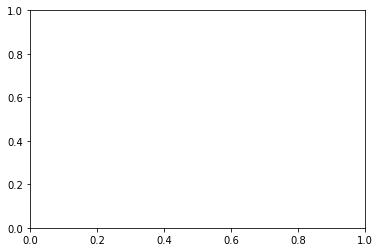

In [34]:
plt.scatter(X_train, y_train ,color='g') 
plt.plot(X_test, pred,color='k') 

plt.show()
plt.savefig("regression_graph.png")

In [ ]:
# Let's log the model we trained along with its metrics, as a new version of the "Regression" model in Vectice.
# Replase ____ by ModelRegister to log your model information to Vectice
model = vectice.ModelRegister(name="Unit Sales Predictor", library="scikit-learn", technique="linear regression", metrics=metrics, attachments="regression_graph.png")

In [ ]:
# Automatically adds to step from above
# If no step is selected during session then it defaults to active iteration and currently active step
iter.model = model

2022/11/18 17:20:40 INFO vectice.models.iteration: Successfully registered Model(name='Unit Sales Predictor', id=153, version='Version 1').
2022/11/18 17:20:41 INFO vectice.models.iteration: Step with id: 105 successfully retrieved.
2022/11/18 17:20:41 INFO vectice.models.iteration: Successfully added Model(name='Unit Sales Predictor', id=153, version='Version 1') to Build Model


In [35]:
modelingSteps.close(message="RMSE=" + str(metrics.value[0]) +  "and MAE=" + str(metrics.value[1])) 
# you should be able to see the model in the ui, with the name, metrics, algorithm

AttributeError: ignored

##Assess Model

In [ ]:
# Get the Collect Initial Data step
modelingSteps = iter.step("Assess model")

2022/11/18 17:31:25 INFO vectice.models.iteration: Step with id: 106 successfully retrieved.


In [ ]:
modelingSteps.close(message="As expected the model performs better however this is not good enough and we should try a different method. We recommend doing a Random Forest as a new iteration")

2022/11/18 17:31:26 INFO vectice.models.step: Assess model was successfully closed.
